# Analysis on Weather data for past 10 Years (2006 - 2016) 

In [62]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Hypothesis Testing: 

The Null Hypothesis H0 is “Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming”

In [63]:
df_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/weatherHistory.csv', parse_dates = ['Formatted Date'] , index_col = ['Formatted Date'])

In [64]:
df_data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


#### To prove our hypothesis lets use Apparent Temperature and Humidity data for further analysis

In [65]:
# check for null values
df_data.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [66]:
# we have enough data with hence we can remove these 517 NULL rows
df = df_data.dropna()
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Loud Cover                95936 non-null  float64
 9   Pressure (millibars)      95936 non-null  float64
 10  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


### Let's resample the data as for Month basis

In [67]:
df.index = pd.to_datetime(df.index , utc =True)
df_r = df.resample('M').mean() 
df_r.head(2)

<ipython-input-67-fb50902a66c3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_r = df.resample('M').mean()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.89000,17.114300,140.000000,9.982000,0.0,1016.66000
2006-01-31 00:00:00+00:00,-1.677942,-4.173708,0.83461,8.894211,161.018817,7.894064,0.0,1021.20496


In [68]:
df_r.tail(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2016-11-30 00:00:00+00:00,5.158800,2.860089,0.848847,10.507636,163.690511,8.725824,0.0,1019.215737
2016-12-31 00:00:00+00:00,1.239158,-2.017272,0.887981,11.024860,179.064603,7.460627,0.0,1019.946339


Let's analyze month-to-month data for Apparent Temperature for All 12 Months.

In [69]:
df_r['month'] = df_r.index.month
df_r['year'] = df_r.index.year
df_r.index = df_r.index.date
df_r = df_r[1:] # remove column with year 2005 column

In [70]:
df_r.head(2)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),month,year
2006-01-31,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,0.0,1021.204960,1,2006
2006-02-28,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,0.0,995.183914,2,2006


In [71]:
# now we have to find avg apparent tempreature for month to month like april 2006 to april 2016
month_to_month_AT = {}
for month in range(1,13):
    month_to_month_AT[month] = list(df_r[df_r['month'] == month]['Apparent Temperature (C)'].values)

# now we have to find avg apparent tempreature for month to month like april 2006 to april 2016
month_to_month_Humidity = {}
for month in range(1,13):
    month_to_month_Humidity[month] = list(df_r[df_r['month'] == month]['Humidity'].values)

In [72]:
title = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
         10:'Oct',11:'Nov',12:'Dec'}
def plot_AT_or_Humidity(what_for , month_dict):
    for index in range(1,13):
        t = title[index]
        plt.plot(range(2006,2017),month_dict[index])
        plt.title(what_for + ' for ' +t+' Month')
        plt.show()

In [73]:
# now we find difference
def find_avg_difference(month_dict):
    difference = []
    for month in range(1,13):
        difference.append(np.mean(month_dict[month]))
    return difference

AT_difference_monthly = find_avg_difference(month_to_month_AT)
Humidity_difference_monthly = find_avg_difference(month_to_month_Humidity)

Text(0.5, 1.0, 'Monthly Average Data(2006-2016) of AT')

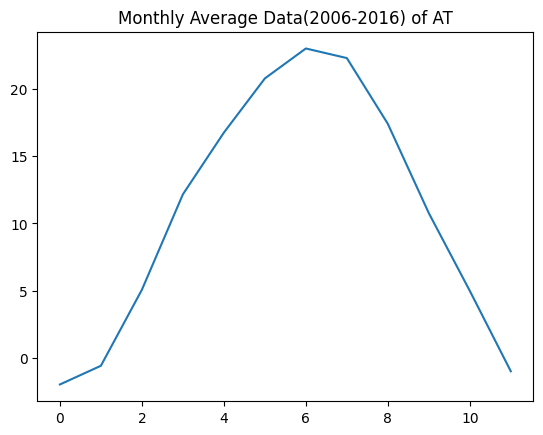

In [74]:
plt.plot(AT_difference_monthly)
plt.title('Monthly Average Data(2006-2016) of AT')

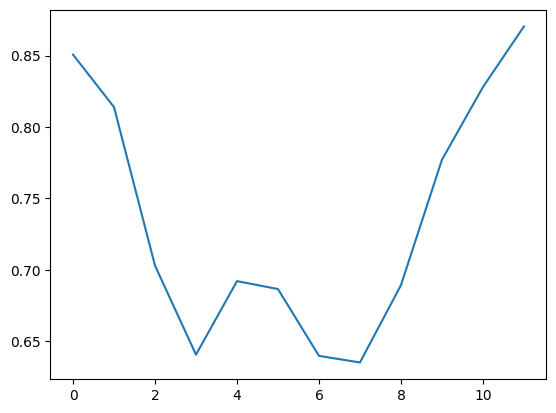

In [75]:
plt.plot(Humidity_difference_monthly)

### Let's pick the month we are intersted in knowing about 
### Let's pick April

Enter Desired month for analysis:
4


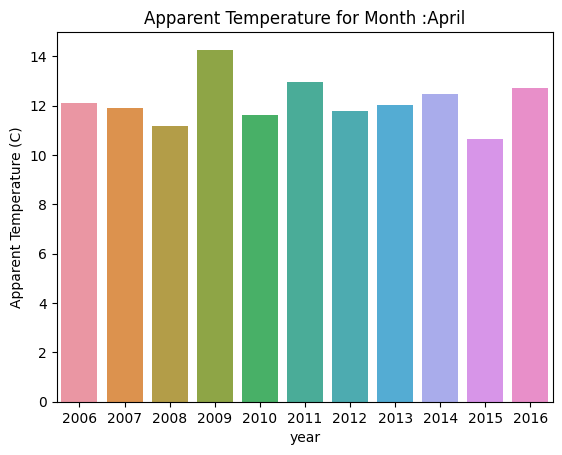

In [76]:
print("Enter Desired month for analysis:")
month = int(input())


df_m_at=df_r[df_r['month']==month]
sns.barplot(x = df_m_at['year'] , y = df_m_at['Apparent Temperature (C)'])
    
plt.title('Apparent Temperature for Month:' + title[month])
plt.show()

As we can see from above graph we can say that month of April had a median of around 10C with a high in 2009 at 14C and low in 2015.

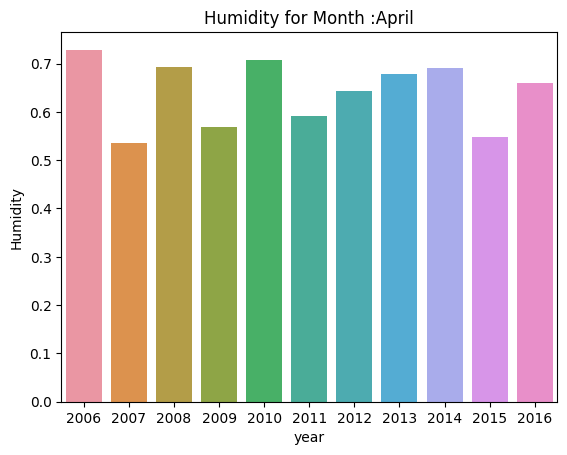

In [77]:
df_m_h=df_r[df_r['month']==month]
sns.barplot(x = df_m_h['year'] , y = df_m_h['Humidity'])
    
plt.title('Humidity for Month:' + title[month])
plt.show()

Here we could see that very year in month of April Humidity is been changing. Interstingly we can see that in 2009 the tempearture was high and Humidity is also low around 0.5

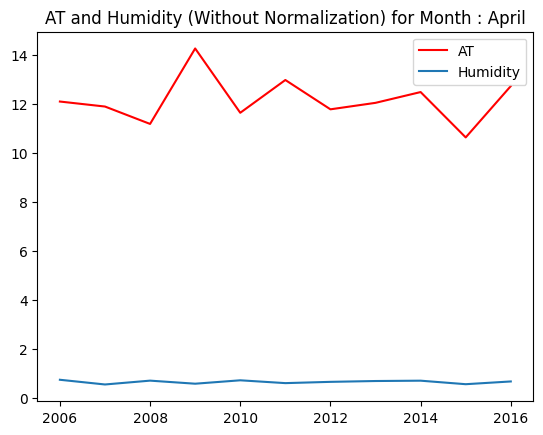

In [78]:
def plot_Humidty_and_AT():
    #for month in range(1,12):
    df_r_m = df_r[df_r['month']==month]
    plt.plot(range(2006,2017),df_r_m['Apparent Temperature (C)'] , label = 'AT' , color = 'red')
    plt.plot(range(2006,2017),df_r_m['Humidity'] , label = 'Humidity')
    plt.legend()
    plt.title('AT and Humidity (Without Normalization) for Month: '+ title[month])
    plt.show()

plot_Humidty_and_AT()

From this, we can see that for the year 2009 Apparent temperature become highest and then again it flctuate. In the year 2015 it becomes lowest and then again it increases. so we can clearly say that for the last 10 years Apparent temperature is uncertain because of the increase in global warming.

## Conclusion :

In this 10 years of Dataset, we can see as per year increases Apparent temperature and humidity are not related. For all the year monthly average humidity is the same but the Apparent temperature is different. Global warming is affecting the earth’s temperature so that we see some uncertainty in this data.